<a href="https://colab.research.google.com/github/albfelix31/csc448/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSc 44800: Artificial Intelligence 
## Assignment 3
### Albert Felix
### Prof. Hunter McNichols
### May 13th, 2021

## Abstract

For this assignment, I found two very interesting datasets: one on chocolates and one on nintendo games. Being stuck at home quarantining for the past year has been pretty isolating and draining, but candies and video games have helped keep me afloat, which is why I chose these datasets. Both of these datasets contain some pretty interesting information, and were also collected very recently.

I will be using the chocolates dataset for sections 1 and 2. I will use a Linear Regression to predict the rating of a specific chocolate bar based on its cocoa percentage. Furthermore, I will be using the nintendo games dataset for sections 3 and 4. I will perform a neural network algorithm to classify which platform a videogame belongs to based off its stats.

Before digging in, let's start with importing the libraries that will be used throughout this assignment.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

## Section 1: Prepping the Regression Dataset

The chocolates dataset contains several columns with information on different chocolate bars. This includes the company that produces the chocolate bar and where it is located, the rating of the chocolate bar and the year that it was reviewed, the origin of the beans used to make it, the cocoa percentage, number of ingredients as well as the different ingredients it may have, and the first, second, third, and fourth tastes it gives out. Below we can take a closer look at some of this data:

In [2]:
chocolates = pd.read_csv("https://www.github.com/albfelix31/csc448/blob/main/Chocolate.csv?raw=true")
chocolates.head(15)

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
5,5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.00,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
6,6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,4.00,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN
7,7,1011,A. Morin,France,2013,Ecuador,Equateur,70.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,nutty,cocoa,fig
8,8,1019,A. Morin,France,2013,Peru,Chanchamayo Province,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,sour,intense tangerine,NaN
9,9,1011,A. Morin,France,2013,Brazil,Brazil,70.0,3.25,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,mild tobacco,NaN,NaN,NaN


For the purpose of this assignment, we can just focus on the following columns:
- **company:** the name of the company that produces the chocolate bar
- **company_location:** location of the company that produces the chocolate bar
- **review_date:** year that the chocolate bar was reviewed
- **country_of_bean_origin:** country of origin for the beans used to make the chocolate bar 
- **cocoa_percent:** percentage of cocoa in the chocolate bar
- **rating:** rating for the chocolate bar
- **counts_of_ingredients:** number of ingredients that the chocolate bar has

Furthermore, it is important to note the details of the scale for the rating column:
- 4.0 - 5.0 = Outstanding
- 3.5 - 3.9 = Highly Recommended
- 3.0 - 3.49 = Recommended
- 2.0 - 2.9 = Disappointing
- 1.0 - 1.9 = Unpleasant

We can also drop the unnecessary columns from our dataset.

In [3]:
del chocolates['ref']
del chocolates['specific_bean_origin_or_bar_name']
del chocolates['cocoa_butter']
del chocolates['beans']
del chocolates['vanilla']
del chocolates['lecithin']
del chocolates['salt']
del chocolates['sugar']
del chocolates['sweetener_without_sugar']
del chocolates['first_taste']
del chocolates['second_taste']
del chocolates['third_taste']
del chocolates['fourth_taste']
del chocolates['Unnamed: 0']
# chocolates.rename( columns={'Unnamed: 0':'ID'}, inplace=True )

Now, the head of our dataset looks more like this:

In [4]:
chocolates.head(15)

,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients
0,5150,U.S.A,2019,Madagascar,76.0,3.75,3
1,5150,U.S.A,2019,Dominican republic,76.0,3.50,3
2,5150,U.S.A,2019,Tanzania,76.0,3.25,3
3,A. Morin,France,2012,Peru,63.0,3.75,4
4,A. Morin,France,2012,Bolivia,70.0,3.50,4
5,A. Morin,France,2013,Venezuela,70.0,4.00,4
6,A. Morin,France,2013,Peru,63.0,4.00,3
7,A. Morin,France,2013,Ecuador,70.0,3.75,4
8,A. Morin,France,2013,Peru,70.0,3.50,4
9,A. Morin,France,2013,Brazil,70.0,3.25,4


In our linear regression, we will utilize the data on the rating and cocoa_percent columns. Our goal is to see if the cocoa percentage of a chocolate bar can be used to predict how it would be rated.

## Section 2: Linear Regression

Now that we have taken a quick look through our dataset, it's time to AI it up!

First, we select the columns that we will utilize for our linear regression. My hypothesis is that the higher the cocoa percentage that a chocolate bar has, the higher it would be rated. As such, we select the columns in our dataset that represent this data.

In [5]:
rating = chocolates[['rating']]
cocoaPercentage = chocolates[['cocoa_percent']]

We can then use sklearn to create our training and test sets. 20% of the dataset will be reserved for testing. This data will be split as follows:

- **x_train:** cocoa percentage values used for training the regression model
- **y_train:** rating values used for training the regression model
- **x_test:** cocoa percentage values used for testing the regression model
- **y_test:** rating values used for testing the regression model

In [6]:
x_train, x_test, y_train, y_test = train_test_split(cocoaPercentage, rating, test_size=0.2, shuffle=True)

Using sklearn, we can fit a linear regression into our training set and create our model. We can do this as follows:

In [7]:
reg = LinearRegression().fit(x_train, y_train)

After training our model, we can move on to testing it. For this, we make use of the predict function, inputting our x_test as its argument. This will give us a prediction of the different ratings for each chocolate bar based on their cocoa percentage that is given in the x_test array.

We can see how these values fare by comparing them with the y_test values. We can do this for the first 15 values of each one.

In [8]:
y_pred = reg.predict(x_test)

for i in range(15):
    x_val = x_test.head(15).values.tolist()[i][0]
    pred_val = round(y_pred[i][0],2)
    actual_val = y_test.head(15).values.tolist()[i][0]
    print("Cocoa percentage:", x_val, "| Predicted rating:", pred_val, "| Actual rating:", actual_val)

Cocoa percentage: 70.0 | Predicted rating: 3.21 | Actual rating: 3.5
Cocoa percentage: 72.0 | Predicted rating: 3.2 | Actual rating: 3.5
Cocoa percentage: 60.0 | Predicted rating: 3.27 | Actual rating: 3.0
Cocoa percentage: 70.0 | Predicted rating: 3.21 | Actual rating: 2.75
Cocoa percentage: 80.0 | Predicted rating: 3.15 | Actual rating: 3.25
Cocoa percentage: 85.0 | Predicted rating: 3.12 | Actual rating: 1.5
Cocoa percentage: 80.0 | Predicted rating: 3.15 | Actual rating: 3.0
Cocoa percentage: 75.0 | Predicted rating: 3.18 | Actual rating: 3.75
Cocoa percentage: 64.0 | Predicted rating: 3.24 | Actual rating: 2.75
Cocoa percentage: 70.0 | Predicted rating: 3.21 | Actual rating: 3.0
Cocoa percentage: 85.0 | Predicted rating: 3.12 | Actual rating: 3.5
Cocoa percentage: 73.0 | Predicted rating: 3.19 | Actual rating: 3.5
Cocoa percentage: 72.0 | Predicted rating: 3.2 | Actual rating: 3.75
Cocoa percentage: 72.0 | Predicted rating: 3.2 | Actual rating: 3.0
Cocoa percentage: 70.0 | Predict

Though the results here don't look too promising, we can still plot our data and see what we find. 

In our data visualization, the training data will be represented in blue dots, whereas the test data will be represented in green dots. Furthermore, we will represent our regression line in red.

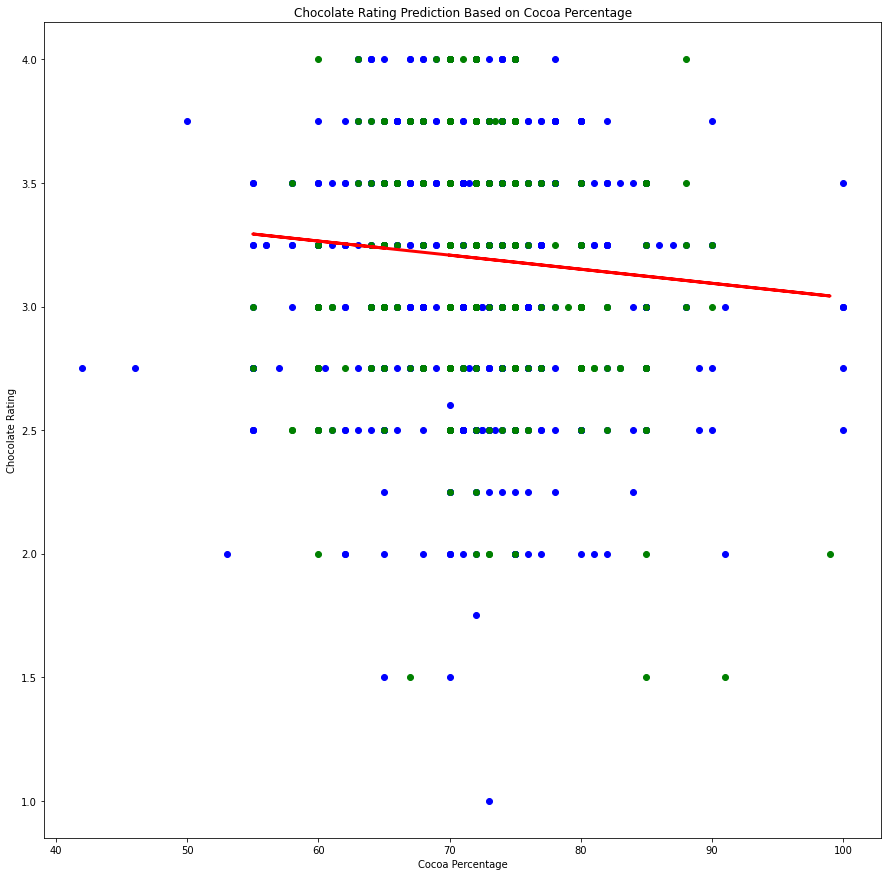

In [9]:
plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("Cocoa Percentage")
plt.ylabel("Chocolate Rating")
plt.title("Chocolate Rating Prediction Based on Cocoa Percentage")

plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, y_pred, color='red', linewidth=3)

plt.show()

Not looking too good. Let us follow up with checking out the mean squared error of this model.

In [10]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.19737458435437838


CONCLUSIONNNNNNNN

## Section 3: Prepping the Classification Dataset

The Nintendo Games dataset contains data on different video games. This includes the game title, the platform where it is played, the date it was released, user score and meta score, ESRB (Entertainment Software Rating Board) rating, its developers, and its genre. Below we can take a look at some of this data:

In [11]:
nintendoGames = pd.read_csv("https://www.github.com/albfelix31/csc448/blob/main/NintendoGames.csv?raw=true")
nintendoGames.head(15)

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario 3D World + Bowser's Fury,Switch,"Feb 12, 2021",NaN,/game/switch/super-mario-3d-world-+-bowsers-fury,NaN,['Nintendo'],"['Action', 'Platformer', '3D']"
1,NaN,Super Smash Bros. Ultimate: Sephiroth,Switch,"Dec 22, 2020",NaN,/game/switch/super-smash-bros-ultimate-sephiroth,NaN,['Nintendo'],"['Action', '2D', 'Fighting']"
2,66.0,Fitness Boxing 2: Rhythm & Exercise,Switch,"Dec 4, 2020",6.2,/game/switch/fitness-boxing-2-rhythm-exercise,E,"['Nintendo', ' Imagineer Co.', 'Ltd.']","['Miscellaneous', 'Exercise / Fitness']"
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,Switch,"Dec 4, 2020",7.6,/game/switch/fire-emblem-shadow-dragon-the-bla...,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']"
4,79.0,Hyrule Warriors: Age of Calamity,Switch,"Nov 20, 2020",8.1,/game/switch/hyrule-warriors-age-of-calamity,T,"['Omega Force', ' Koei Tecmo Games']","['Action', ""Beat-'Em-Up"", '3D']"
5,NaN,Pokemon Sword + Pokemon Sword Expansion Pass,Switch,"Nov 6, 2020",6.7,/game/switch/pokemon-sword-+-pokemon-sword-exp...,E,['Game Freak'],"['Role-Playing', 'Trainer']"
6,NaN,Pokemon Shield + Pokemon Shield Expansion Pass,Switch,"Nov 6, 2020",6.6,/game/switch/pokemon-shield-+-pokemon-shield-e...,E,['Game Freak'],"['Role-Playing', 'Trainer']"
7,85.0,Pikmin 3 Deluxe,Switch,"Oct 30, 2020",8.4,/game/switch/pikmin-3-deluxe,E10+,"['Eighting', ' Nintendo']","['Strategy', 'Real-Time', 'General']"
8,79.0,Part Time UFO,Switch,"Oct 28, 2020",7.3,/game/switch/part-time-ufo,E10+,['HAL Labs'],"['Action', 'Arcade']"
9,NaN,Cadence of Hyrule: Crypt of the NecroDancer Fe...,Switch,"Oct 23, 2020",NaN,/game/switch/cadence-of-hyrule-crypt-of-the-ne...,E,['Brace Yourself Games'],"['Action', 'Rhythm', 'Music']"


Our goal in this assignment is to see whether we can use data on video games such as ESRB rating, user score, and meta score to determine the platform that a game belongs to. As such, let us summarize some of this information below:

- **ESRB Rating:** possible values include 'E', 'T', 'E10+', and 'M'
- **Platform:** possible values include 'Switch', 'iOS', '3DS', 'WIIU', 'DS', 'WII', 'GBA', 'GC', and 'N64'
- **User Score:** values may range between 0 and 100
- **Meta Score:** values may range between 0 and 100

For ESRB rating and platform, values will be mapped as follows:

<ins>ESRB Rating</ins>
- 'E': 0
- 'T': 1
- 'E10+': 2
- 'M': 3

<ins>Platform</ins>
- 'Switch': 0
- 'iOS': 1
- '3DS': 2
- 'WIIU': 3
- 'DS': 4
- 'WII': 5
- 'GBA': 6
- 'GC': 7
- 'N64': 8

Now let us clean up our data, drop the columns we will not be using, and map our data on ESRB rating and platform columns to the values we assigned them:

In [12]:
nintendoGames = nintendoGames.dropna()
del nintendoGames['link']
del nintendoGames['date']
del nintendoGames['developers']
del nintendoGames['genres']
nintendoGames["platform"].replace({"Switch": 0, "iOS": 1, "3DS": 2, "WIIU": 3, 
                                   "DS": 4, "WII": 5, "GBA": 6, "GC": 7, "N64": 8}, inplace=True)
nintendoGames["esrb_rating"].replace({"E": 0, "T": 1, "E10+": 2, "M": 3}, inplace=True)
nintendoGames["meta_score"] = pd.to_numeric(nintendoGames["meta_score"], downcast="float")
nintendoGames["user_score"] = pd.to_numeric(nintendoGames["user_score"], downcast="float")
nintendoGames.head(15)

,meta_score,title,platform,user_score,esrb_rating
2,66.0,Fitness Boxing 2: Rhythm & Exercise,0,6.2,0
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,0,7.6,0
4,79.0,Hyrule Warriors: Age of Calamity,0,8.1,1
7,85.0,Pikmin 3 Deluxe,0,8.4,2
8,79.0,Part Time UFO,0,7.3,2
11,75.0,Mario Kart Live: Home Circuit,0,7.3,0
17,82.0,Super Mario 3D All-Stars,0,6.3,0
20,80.0,Paper Mario: The Origami King,0,7.0,0
22,64.0,Pokemon Cafe Mix,0,7.7,0
23,69.0,Pokemon Sword / Shield: The Isle of Armor,0,5.3,0


With our data cleaned and mapped as needed, we can now move on to some AI model learning and data classification.

## Section 4: Classification with a Neural Network

For this section, we will use ESRB rating, user score, and meta score to predict the platform that a video game belongs to. We will do this using the neural network classification algorithm.

To start off, we will split our data into a training and test set, reserving 20% of our dataset for testing. We will  split our data as follows:

- **x_train:** ESRB rating, user score, and meta score data reserved for training our model
- **y_train:** game platform data reserved for training our model
- **x_test:** ESRB rating, user score, and meta score data reserved for testing our model
- **y_test:** game platform data reserved for testing our model

In [13]:
x = nintendoGames[["meta_score", "user_score", "esrb_rating"]]
y = nintendoGames['platform']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

Next, we must scale our data for our neural network. We do this because it allows for gradient descent to converge at a faster rate, speeds up learning, and ensures that our selected features will not contain higher value ranges dominating our distance calculations. Thus, I will use the StandardScaler function from sklearn to standardize our dataset values.

In [21]:
scaler = preprocessing.StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

We can now move on to building our classifier and fitting it to our training set! Again, for this assignment, I will be fitting the Neural Network Algorithm into our dataset. It will have X hidden layers with Y nodes per layer. We will use the Multi-Layer Perceptron Classifier (MLPClassifier) from sklearn for this.

In [57]:
# classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# classifier = MLPClassifier(hidden_layer_sizes = (150,100,50), max_iter = 300,
#                            activation = 'relu', solver = 'adam', random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=3000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
predict_train = classifier.predict(x_train)
predict_test = classifier.predict(x_test)

Lastly, we can report on the error rate of our algorithm to measure its accuracy. We can also check out the classification_report of how well our algorithm performs.

In [59]:
print(classification_report(y_train, predict_train))
print("Accuracy of MLPClassifier: ", classifier.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.41      0.36      0.38        72
           1       0.00      0.00      0.00         2
           2       0.39      0.71      0.50       110
           3       0.50      0.12      0.19        43
           4       0.31      0.33      0.32        81
           5       0.38      0.14      0.21        63
           6       0.38      0.60      0.47        50
           7       0.27      0.08      0.12        38
           8       0.29      0.09      0.13        23

    accuracy                           0.37       482
   macro avg       0.32      0.27      0.26       482
weighted avg       0.37      0.37      0.33       482

Accuracy of MLPClassifier:  0.2892561983471074


CONCLUSIONNNN

## Conclusion